In [1]:
import pandas as pd
import pytz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Changing Some Assumptions

In [2]:
# EXTRACTION
df_traj = pd.read_csv("trip_traj.csv")
df_od = pd.read_csv("trip_od.csv")
df_vo = pd.read_excel("JICA Tables.xlsx", sheet_name='Table 2.1.10')

print("TRIP OD")
display(df_od.head())
display(df_od.shape)
# display(df_traj.head())
# display(df_traj.shape)

# DATA CLEANING
column_rename = {'Unnamed: 0': 'index'}
df_traj = df_traj.rename(columns=column_rename)
df_od = df_od.rename(columns=column_rename)
df_od = df_od[['index', 'id', 'start_lat', 'start_lon', 'end_lat', 'end_lon', 'time', 'dt', 'distance', 'aver_speed']]

# Setting time
# df_od['time'] = pd.to_datetime(df_od['time'], unit='s')
# timezone = pytz.timezone('Etc/GMT+7')
# df_od['time'] = df_od['time'].dt.tz_localize(pytz.utc).dt.tz_convert(timezone)

print("TRIP OD")
display(df_od.head())
display(df_od.shape)

TRIP OD


,Unnamed: 0,id,start_lat,start_lon,end_lat,end_lon,path,time,dt,distance,aver_speed
0,82630,NjdxOTRxNzE5azl0YTo5a2JiMW9lcXFrY2dk,11.54902,104.91924,11.54807,104.93109,"149.0,150.0,151.0,152.0,153.0,154.0,155.0,156....",1689094803,676,2835.936342,4.195172
1,82631,OGppY242cWo4Zm90NjpmZ2JrcG81b2k0cTdq,11.55893,104.90146,11.56971,104.89853,"961.0,962.0,963.0,964.0,965.0,966.0,967.0,968....",1689094812,223,2752.782123,12.344314
2,82632,NGxjNTZiNWhtMW8yazo5dm1ybmpyZXY5dmNx,11.57772,104.88223,11.57468,104.88775,"1678.0,1679.0,1680.0,1681.0,1682.0,1683.0,1684...",1689094818,227,1366.980997,6.021943
3,82633,NmoxOXFidTE2NDE3dTpkajBxMWlzMWVyYWE1,11.59833,104.88362,11.60824,104.89405,"1028.0,1029.0",1689094842,610,1583.232169,2.595463
4,82634,NzEzazAzOGQ0b2hzbzpjY2N2NXNmY3N2ZWV0,11.62541,104.92467,11.63609,104.92019,"297.0,298.0,299.0,300.0,301.0",1689094879,429,1324.683042,3.087839


(44102, 11)

TRIP OD


,index,id,start_lat,start_lon,end_lat,end_lon,time,dt,distance,aver_speed
0,82630,NjdxOTRxNzE5azl0YTo5a2JiMW9lcXFrY2dk,11.54902,104.91924,11.54807,104.93109,1689094803,676,2835.936342,4.195172
1,82631,OGppY242cWo4Zm90NjpmZ2JrcG81b2k0cTdq,11.55893,104.90146,11.56971,104.89853,1689094812,223,2752.782123,12.344314
2,82632,NGxjNTZiNWhtMW8yazo5dm1ybmpyZXY5dmNx,11.57772,104.88223,11.57468,104.88775,1689094818,227,1366.980997,6.021943
3,82633,NmoxOXFidTE2NDE3dTpkajBxMWlzMWVyYWE1,11.59833,104.88362,11.60824,104.89405,1689094842,610,1583.232169,2.595463
4,82634,NzEzazAzOGQ0b2hzbzpjY2N2NXNmY3N2ZWV0,11.62541,104.92467,11.63609,104.92019,1689094879,429,1324.683042,3.087839


(44102, 10)

# (1) Generating the Coordinates
Revised Assumption: starting & ending coordinates are not considered independently.  

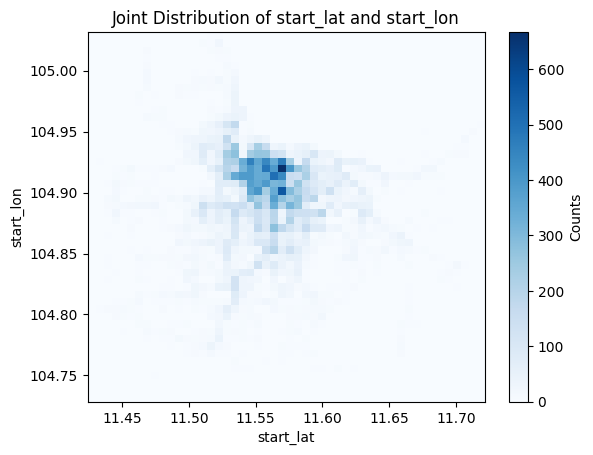

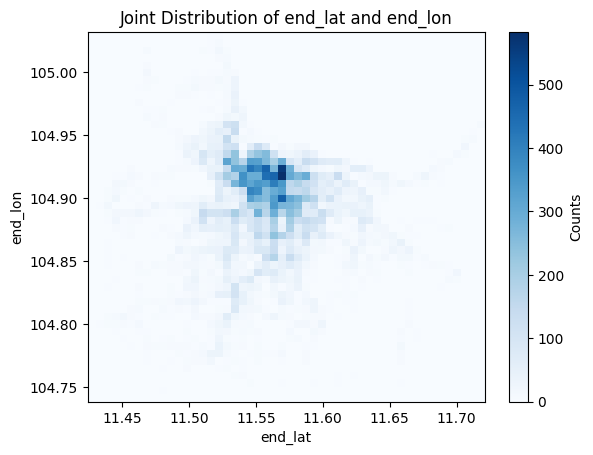

In [3]:
# JOINT DISTRIBUTION: Plotting the joint distribution of start_lat and start_lon, and of end_lat and end_lon 

plt.hist2d(df_od['start_lat'], df_od['start_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('start_lat')
plt.ylabel('start_lon')
plt.title('Joint Distribution of start_lat and start_lon')
plt.show()
plt.clf()

plt.hist2d(df_od['end_lat'], df_od['end_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('end_lat')
plt.ylabel('end_lon')
plt.title('Joint Distribution of end_lat and end_lon')
plt.show()

### Attempt 1

In [4]:
# 4D KDE PLOT, ATTEMPT 1
from scipy.stats import gaussian_kde
np.random.seed(42)  

num_points = 2 * 10**6

data = df_od[['start_lat', 'start_lon', 'end_lat', 'end_lon']].values
kde_4d = gaussian_kde([df_od['start_lat'], df_od['start_lon'], df_od['end_lat'], df_od['end_lon']])

np_start_lat, np_start_lon, np_end_lat, np_end_lon = np.zeros(num_points), np.zeros(num_points), np.zeros(num_points), np.zeros(num_points)

for i in range(num_points):
    point = kde_4d.resample(size=1)
    np_start_lat[i], np_start_lon[i], np_end_lat[i], np_end_lon, = point[0][0], point[1][0], point[2][0], point[3][0]

df_coordinates = pd.DataFrame({
    'start_lat': np_start_lat, 'start_lon': np_start_lon,
    'end_lat': np_end_lat, 'end_lon': np_end_lon
})

display(df_coordinates.head())
display(df_coordinates.shape)

,start_lat,start_lon,end_lat,end_lon
0,11.533787,104.943618,11.528858,104.931838
1,11.594446,104.912298,11.597105,104.931838
2,11.542918,104.892768,11.545151,104.931838
3,11.467200,104.893968,11.457594,104.931838
4,11.527282,104.924191,11.535079,104.931838


(2000000, 4)

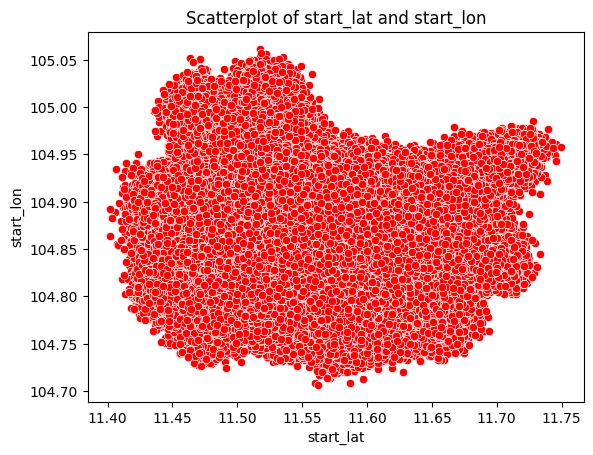

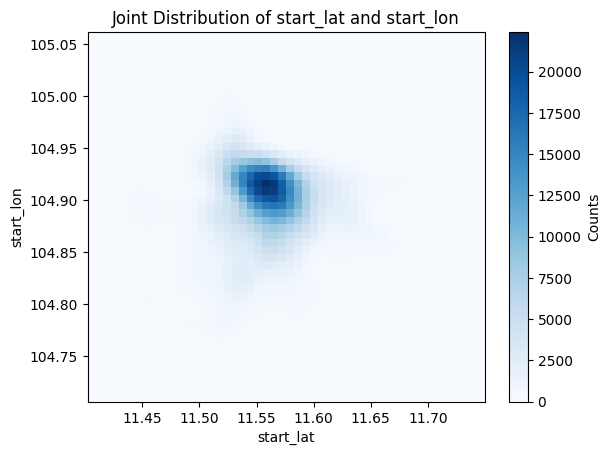

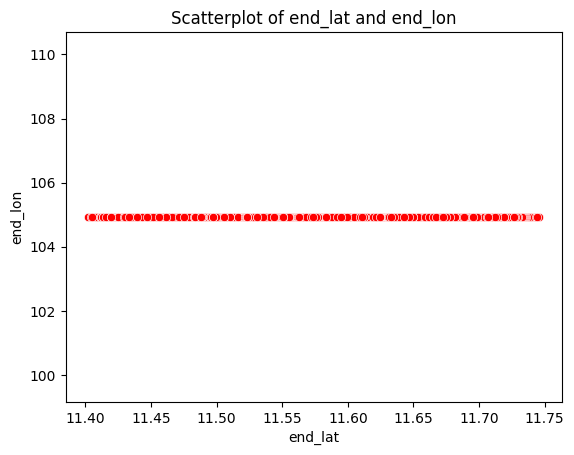

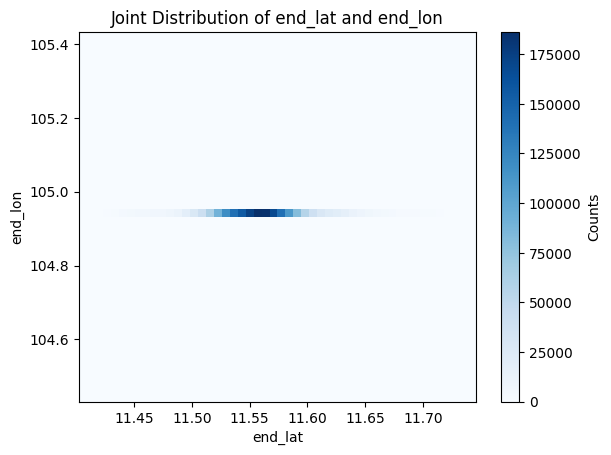

In [8]:
# DISPLAY: VISUALIZATION FOR GENERATED COORDINATES

# STARTING COORDINATES
sns.scatterplot(data=df_coordinates, x='start_lat', y='start_lon', color='red')
plt.xlabel('start_lat')
plt.ylabel('start_lon')
plt.title('Scatterplot of start_lat and start_lon')
plt.show()

plt.hist2d(df_coordinates['start_lat'], df_coordinates['start_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('start_lat')
plt.ylabel('start_lon')
plt.title('Joint Distribution of start_lat and start_lon')
plt.show()

# ENDING COORDINATES
sns.scatterplot(data=df_coordinates, x='end_lat', y='end_lon', color='red')
plt.xlabel('end_lat')
plt.ylabel('end_lon')
plt.title('Scatterplot of end_lat and end_lon')
plt.show()

plt.hist2d(df_coordinates['end_lat'], df_coordinates['end_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('end_lat')
plt.ylabel('end_lon')
plt.title('Joint Distribution of end_lat and end_lon')
plt.show()


In [6]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a 4D KDE plot using color to represent density
# sns.kdeplot(data=df_od, x='start_lat', y='start_lon', hue='end_lat', hue_order=sorted(df_od['end_lat'].unique()), cmap='Blues', fill=True, cbar=True)
# plt.xlabel('start_lat')
# plt.ylabel('start_lon')
# plt.title('4D Joint Distribution of start_lat, start_lon, and end_lat')
# plt.show()


### Attempt 2

In [14]:
# 4D KDE PLOT, ATTEMPT 2
np.random.seed(42)  


start_lat = df_od['start_lat']
start_lon = df_od['start_lon']
end_lat = df_od['end_lat']
end_lon = df_od['end_lon']
coords = np.vstack([start_lat, start_lon, end_lat, end_lon])

# Creating the 4D KDE model
kde_4d = gaussian_kde(coords)

# Generating the samples
num_samples = 2 * 10**6
samples = kde_4d.resample(size=num_samples)

df_coordinates = pd.DataFrame(samples.T, columns=['start_lat', 'start_lon', 'end_lat', 'end_lon'])

display(df_coordinates.head())
display(df_coordinates.shape)

,start_lat,start_lon,end_lat,end_lon
0,11.444597,104.897918,11.435758,104.884343
1,11.569081,104.928931,11.591062,104.894261
2,11.592753,104.903897,11.607519,104.905267
3,11.577568,104.920468,11.572821,104.932633
4,11.546032,104.869526,11.579504,104.891386


(2000000, 4)

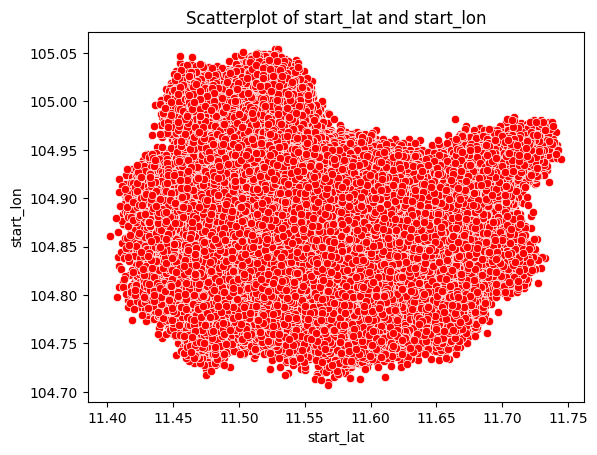

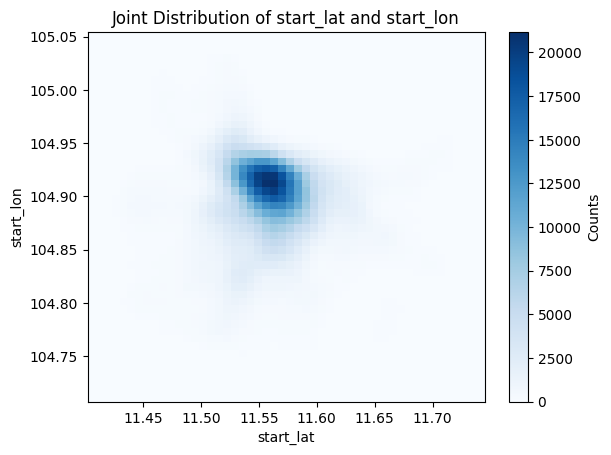

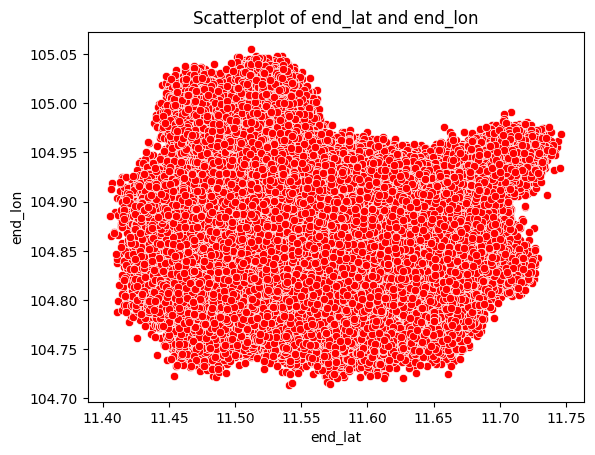

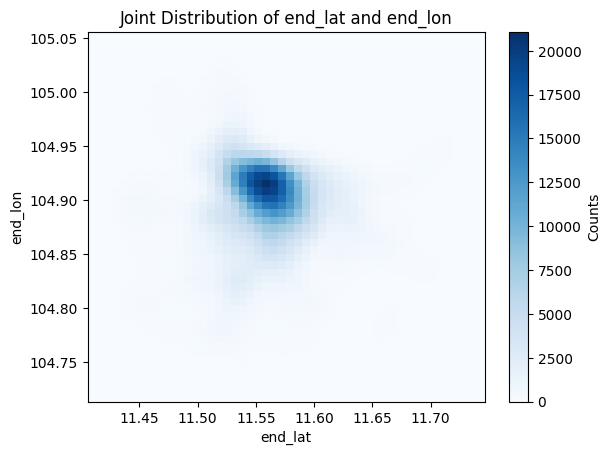

In [15]:
# DISPLAY: VISUALIZATION FOR GENERATED COORDINATES

# STARTING COORDINATES
sns.scatterplot(data=df_coordinates, x='start_lat', y='start_lon', color='red')
plt.xlabel('start_lat')
plt.ylabel('start_lon')
plt.title('Scatterplot of start_lat and start_lon')
plt.show()

plt.hist2d(df_coordinates['start_lat'], df_coordinates['start_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('start_lat')
plt.ylabel('start_lon')
plt.title('Joint Distribution of start_lat and start_lon')
plt.show()

# ENDING COORDINATES
sns.scatterplot(data=df_coordinates, x='end_lat', y='end_lon', color='red')
plt.xlabel('end_lat')
plt.ylabel('end_lon')
plt.title('Scatterplot of end_lat and end_lon')
plt.show()

plt.hist2d(df_coordinates['end_lat'], df_coordinates['end_lon'], bins=(50, 50), cmap=plt.cm.Blues)
plt.colorbar(label='Counts')
plt.xlabel('end_lat')
plt.ylabel('end_lon')
plt.title('Joint Distribution of end_lat and end_lon')
plt.show()


### Checking the Distance

In [17]:
# DISTANCE
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Calculate the distance
    R = 6371.0    
    distance = R * c
    return 1000 * distance

df_coordinates['distance'] = float(0)

for i in range(len(df_coordinates)):
    start_lat, start_lon = df_coordinates.at[i, 'start_lat'], df_coordinates.at[i, 'start_lon']
    end_lat, end_lon = df_coordinates.at[i, 'end_lat'], df_coordinates.at[i, 'end_lon'] 
        
    df_coordinates.at[i,'distance'] = haversine(start_lat, start_lon, end_lat, end_lon)

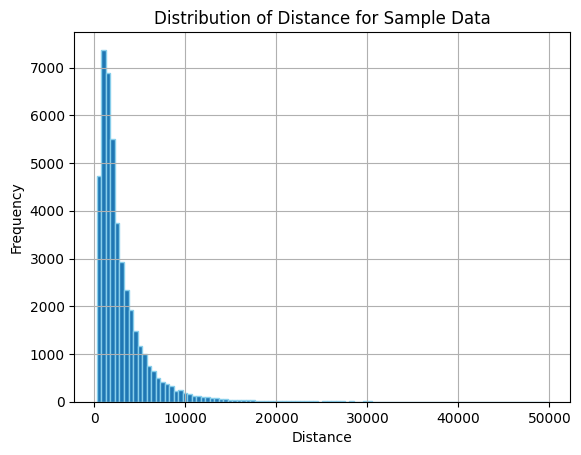

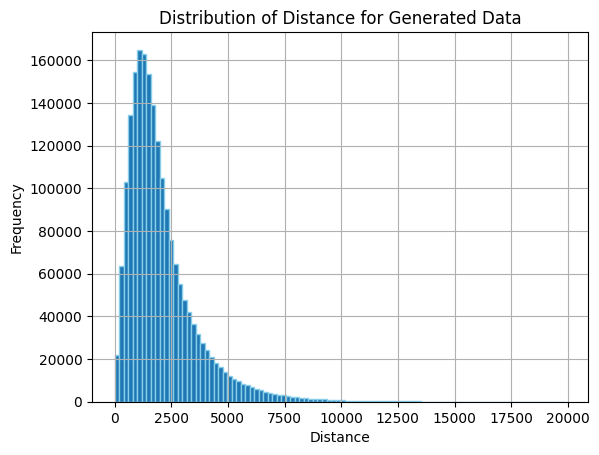

In [21]:
# DISPLAY: Distance of samples vs Distance of Generated Data

# SAMPLES
# plt.figure(figsize=(8, 6))
distance_samples = df_od['distance']
plt.hist(distance_samples, bins=100, edgecolor='skyblue')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance for Sample Data')
plt.grid(True)
plt.show()

# GENERATED DATA
# plt.figure(figsize=(8, 6))
distance_generated = df_coordinates['distance']
plt.hist(distance_generated, bins=100, edgecolor='skyblue')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance for Generated Data')
plt.grid(True)
plt.show()

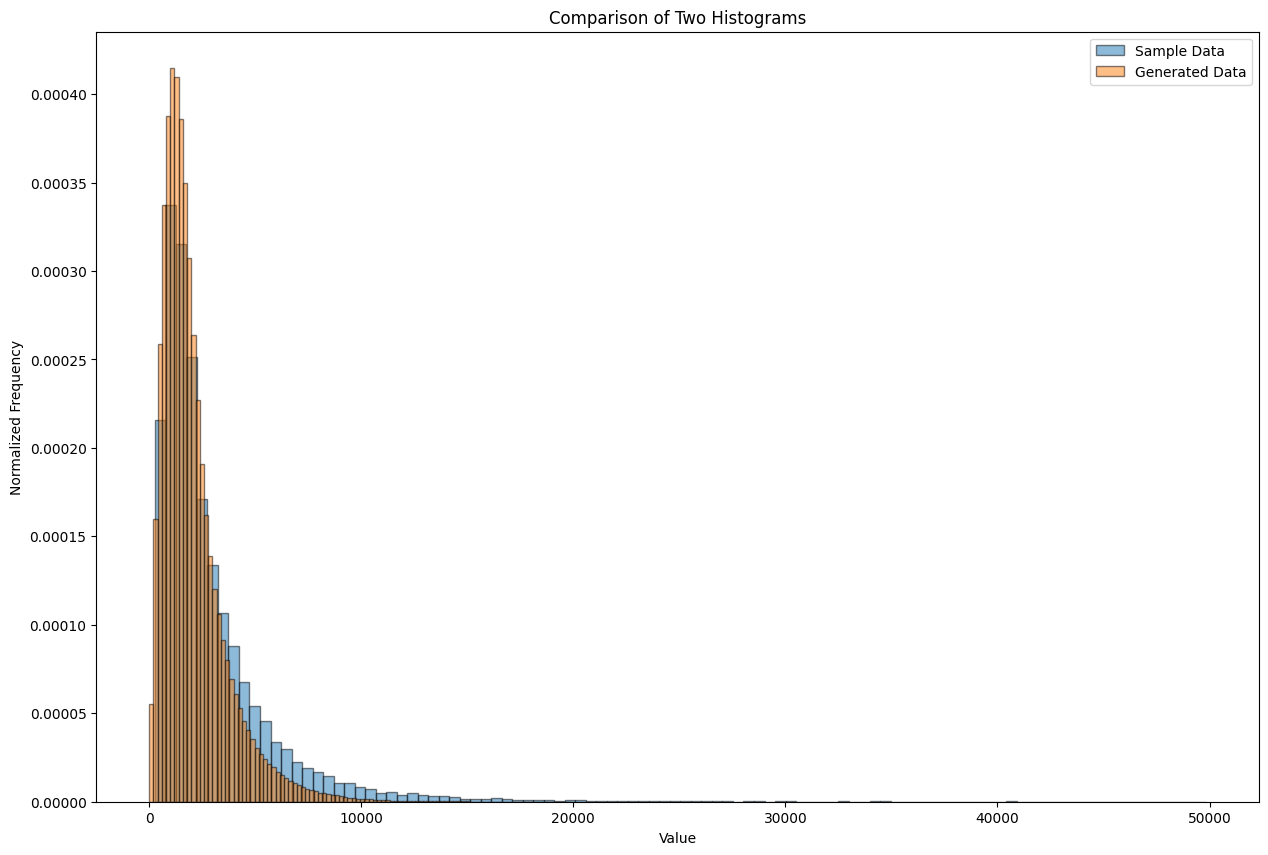

In [37]:
# COMPARISON

data1 = distance_samples.tolist()
data2 = distance_generated.tolist()

# Calculate histograms with normalized frequencies
hist_data1, bin_edges1 = np.histogram(data1, bins=100, density=True)
hist_data2, bin_edges2 = np.histogram(data2, bins=100, density=True)

# Plot histograms
plt.figure(figsize=(15, 10))
plt.hist(bin_edges1[:-1], bin_edges1, weights=hist_data1, alpha=0.5, label='Sample Data', edgecolor='black')
plt.hist(bin_edges2[:-1], bin_edges2, weights=hist_data2, alpha=0.5, label='Generated Data', edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Normalized Frequency')
plt.title('Comparison of Two Histograms')
plt.legend()
plt.show()